In [46]:
import pandas as pd

In [47]:
data=pd.read_csv('/content/Housing_encoded_data (1).csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [48]:
# Check for missing values in the DataFrame
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [49]:
# checking for duplicates in data

data.duplicated().sum()

0

In [50]:
# prompt: Remove all outliers from the data

import pandas as pd
import numpy as np

# Assuming 'data' DataFrame is already loaded as shown in the prompt

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Replace 'price' and 'area' with your relevant numerical columns
numerical_columns = ['price', 'area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

data_no_outliers = data.copy()  # Create a copy to avoid modifying the original DataFrame
for column in numerical_columns:
    data_no_outliers = remove_outliers(data_no_outliers, column)

data_no_outliers


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,2
108,6107500,3240,4,1,3,1,0,0,0,0,1,0,2
137,5740000,4640,4,1,2,1,0,0,0,0,1,0,2
158,5495000,7980,3,1,1,1,0,0,0,0,2,0,2
199,4907000,4200,3,1,2,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2100000,3360,2,1,1,1,0,0,0,0,1,0,3
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,3
538,1890000,3649,2,1,1,1,0,0,0,0,0,0,3
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3


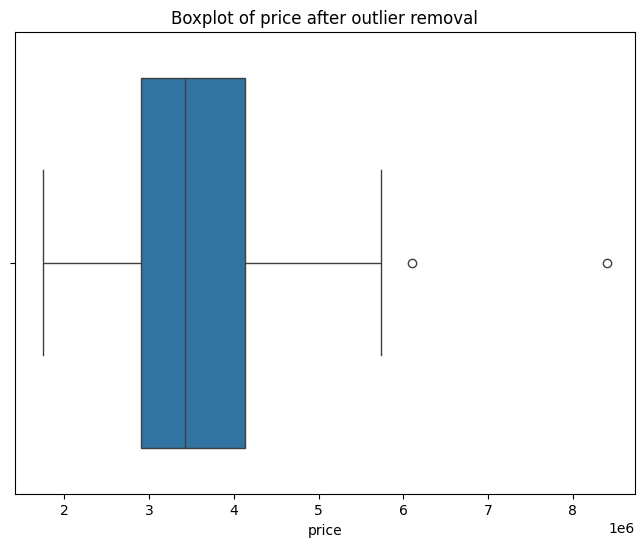

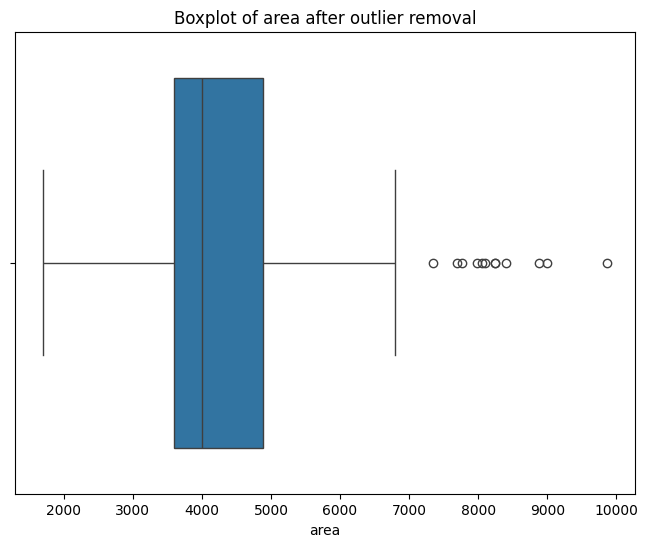

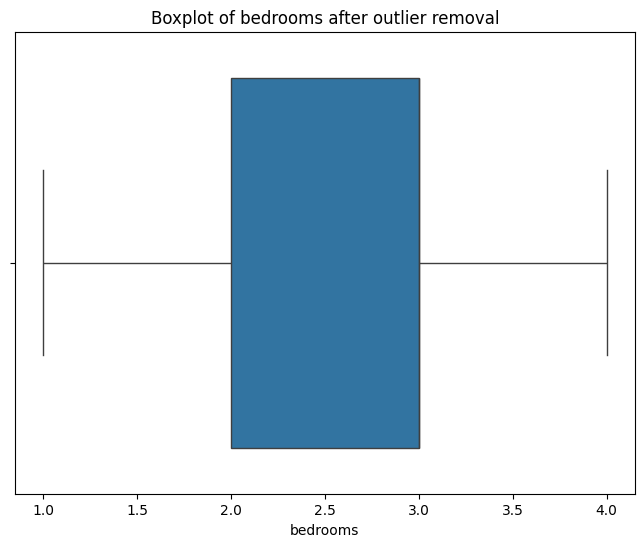

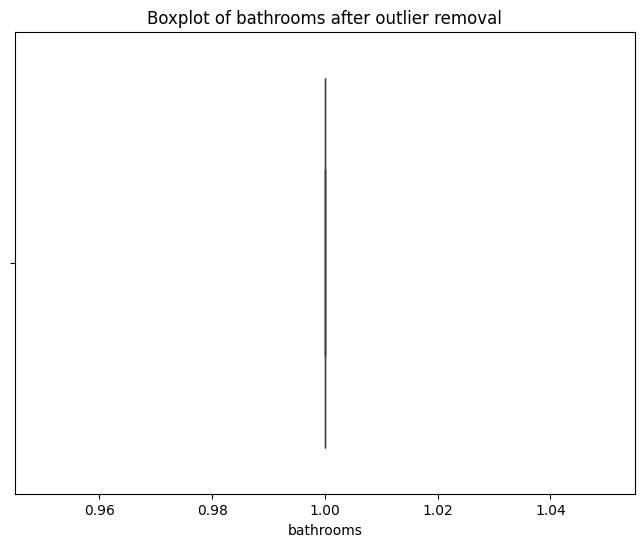

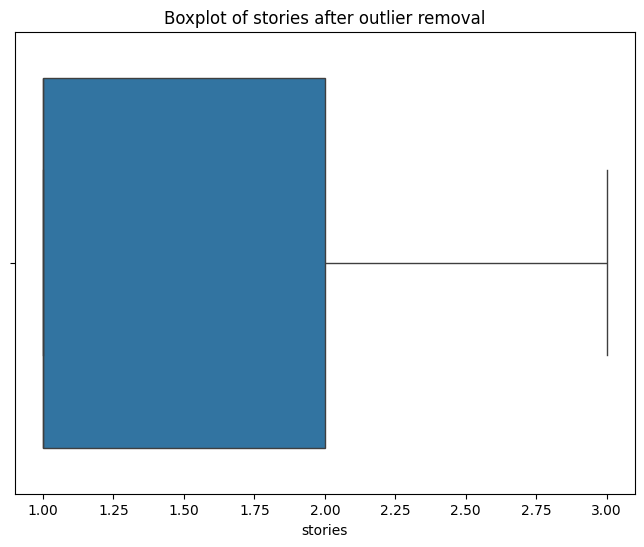

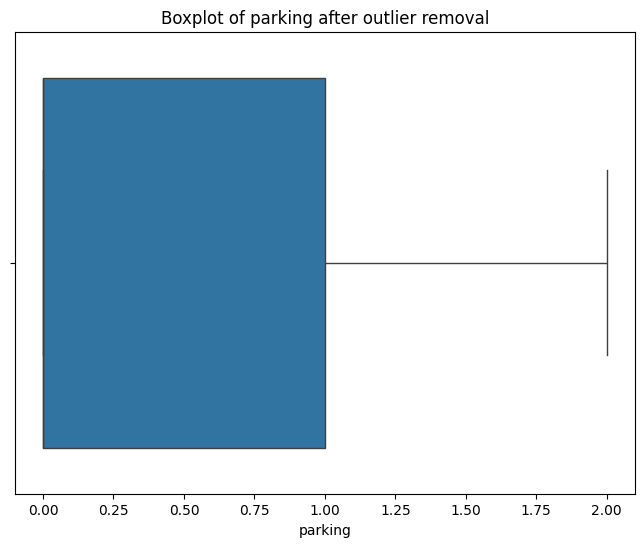

In [52]:
# prompt: Generate boxplot for all numeric and discrete columns of the data after outliers removal

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_no_outliers' DataFrame is already created and contains the data with outliers removed as shown in the previous code

# Select numerical and discrete columns for boxplot
numerical_discrete_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']  # Example, replace with your actual columns

# Create boxplots for each selected column
for col in numerical_discrete_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_no_outliers[col])
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.xlabel(col)
    plt.show()


In [53]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,2.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000


In [54]:
# prompt: Extract correlation matrix from the data

correlation_matrix = data.corr()
correlation_matrix


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [55]:
# prompt: let dependent variable y be 'price' and independent variables x be ('area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus')

import statsmodels.api as sm

# Define dependent and independent variables
y = data['price']
x = data[['area', 'bedrooms','bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]



In [56]:
# prompt: show dependent variable column after removal of outlier

# Assuming 'data_no_outliers' DataFrame is already created as shown in the previous code.

# Define dependent variable from the outlier-removed DataFrame
y_no_outliers = data_no_outliers['price']

# Display the dependent variable column after outlier removal
y_no_outliers


,price
27,8400000
108,6107500
137,5740000
158,5495000
199,4907000
...,...
535,2100000
537,1890000
538,1890000
542,1750000


In [57]:
# prompt: show independent variable column after removal of outliers

# Assuming 'data_no_outliers' DataFrame is already created as shown in the previous code.

# Define independent variables from the outlier-removed DataFrame
x_no_outliers = data_no_outliers[['area', 'bedrooms','bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

# Display the independent variable columns after outlier removal
x_no_outliers


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,1,0,0,0,0,1,0,2
108,3240,4,1,3,1,0,0,0,0,1,0,2
137,4640,4,1,2,1,0,0,0,0,1,0,2
158,7980,3,1,1,1,0,0,0,0,2,0,2
199,4200,3,1,2,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,3360,2,1,1,1,0,0,0,0,1,0,3
537,1700,3,1,2,1,0,0,0,0,0,0,3
538,3649,2,1,1,1,0,0,0,0,0,0,3
542,3620,2,1,1,1,0,0,0,0,0,0,3


In [58]:
# prompt: Extract multiple linear regression for 'x' and 'y'

# Import the necessary library
import statsmodels.api as sm

# Add a constant to the independent variables
x = sm.add_constant(x)

# Fit the multiple linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.24
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          3.81e-123
Time:                        06:21:55   Log-Likelihood:                -8333.0
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.151e+05   2.95e+05  

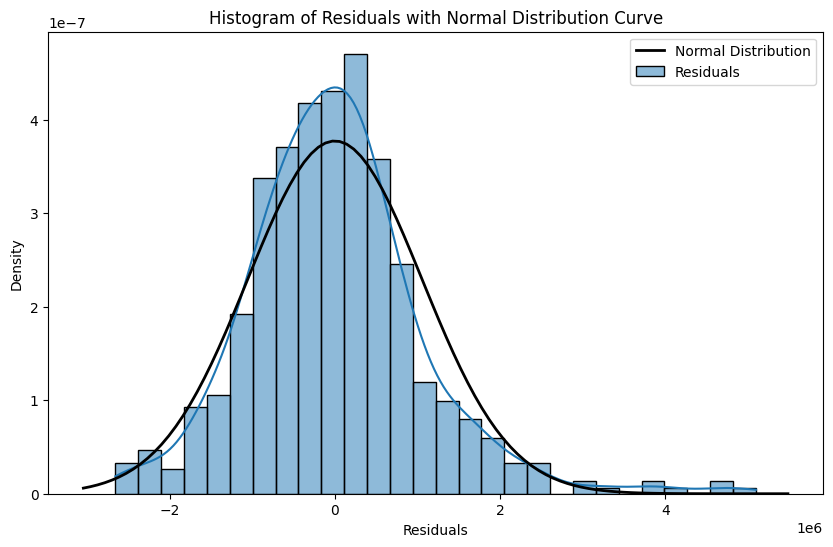

In [59]:
# prompt: check whether the residuals are normally distributed and plot histogram with line

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'model' is the fitted OLS model from the previous code.

# Get the residuals
residuals = model.resid

# Check for normality using a histogram with a fitted normal distribution line
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, stat='density', label='Residuals')

# Overlay a normal distribution curve
from scipy.stats import norm
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Histogram of Residuals with Normal Distribution Curve')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()




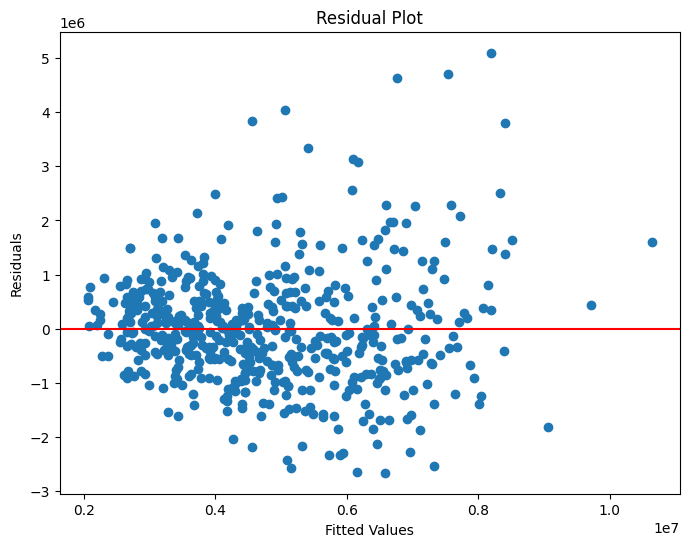

In [60]:
# check for homoscedasticity of model through residual plot

import matplotlib.pyplot as plt
# 2. Homoscedasticity (Constant Variance of Residuals)
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()


In [61]:
# perform white test to check for homoscedasticity of model

# 2. Homoscedasticity (Constant Variance of Residuals) - White Test
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(residuals, model.model.exog)

# Print the test results
labels = ['Test Statistic', 'P-value', 'F-Statistic', 'F-P-value']
print(dict(zip(labels, white_test)))

# Interpret the results
alpha = 0.05  # Significance level
if white_test[1] < alpha:
    print("Reject the null hypothesis. Heteroscedasticity is present.")
else:
    print("Fail to reject the null hypothesis. Homoscedasticity is present.")

{'Test Statistic': 179.3898162806949, 'P-value': 6.972299834001142e-09, 'F-Statistic': 2.686940482478767, 'F-P-value': 2.344556262203025e-11}
Reject the null hypothesis. Heteroscedasticity is present.
